## Assignment - 7 - MODEL SELECTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1 - Data Preprocessing

In [2]:
data=pd.read_csv("car data.csv")


In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.drop('Owner',axis=1,inplace=True)

In [5]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual
...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual


In [6]:
categorical_columns = ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']
data_encoded = pd.get_dummies(data, columns=categorical_columns,dtype=int)
data_encoded


,Year,Selling_Price,Present_Price,Kms_Driven,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
297,2015,4.00,5.90,60000,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
298,2009,3.35,11.00,87934,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
299,2017,11.50,12.50,9000,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [7]:
column_mapping={
 'Car_Name_800':'800',
 'Car_Name_Activa 3g':'Activa 3g',
 'Car_Name_Activa 4g':'Activa 4g',
 'Car_Name_Bajaj ct 100':'Bajaj ct 100',
 'Car_Name_Bajaj Avenger 150':'Bajaj Avenger 150',
 'Car_Name_Bajaj Avenger 150 street':'Avenger 150 street',
 'Car_Name_vitara brezza':'vitara brezza',
 'Car_Name_wagonr':'wagonr',
 'Car_Name_xcent':'xcent',
 }
data_encoded.rename(columns=column_mapping,inplace=True)

In [8]:
data_encoded

,Year,Selling_Price,Present_Price,Kms_Driven,800,Activa 3g,Activa 4g,Car_Name_Bajaj ct 100,Bajaj Avenger 150,Avenger 150 street,...,vitara brezza,Car_Name_wagon r,xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
297,2015,4.00,5.90,60000,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
298,2009,3.35,11.00,87934,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
299,2017,11.50,12.50,9000,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [9]:
data_encoded.drop('800',axis=1,inplace=True)

In [10]:
data_encoded

,Year,Selling_Price,Present_Price,Kms_Driven,Activa 3g,Activa 4g,Car_Name_Bajaj ct 100,Bajaj Avenger 150,Avenger 150 street,Car_Name_Bajaj Avenger 220,...,vitara brezza,Car_Name_wagon r,xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
297,2015,4.00,5.90,60000,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
298,2009,3.35,11.00,87934,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
299,2017,11.50,12.50,9000,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [11]:
data=data_encoded.copy()

In [12]:
data

,Year,Selling_Price,Present_Price,Kms_Driven,Activa 3g,Activa 4g,Car_Name_Bajaj ct 100,Bajaj Avenger 150,Avenger 150 street,Car_Name_Bajaj Avenger 220,...,vitara brezza,Car_Name_wagon r,xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
297,2015,4.00,5.90,60000,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
298,2009,3.35,11.00,87934,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
299,2017,11.50,12.50,9000,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [13]:
data.shape
data.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Activa 3g',
       'Activa 4g', 'Car_Name_Bajaj  ct 100', 'Bajaj Avenger 150',
       'Avenger 150 street', 'Car_Name_Bajaj Avenger 220',
       ...
       'vitara brezza', 'Car_Name_wagon r', 'xcent', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Dealer',
       'Seller_Type_Individual', 'Transmission_Automatic',
       'Transmission_Manual'],
      dtype='object', length=108)

In [14]:
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Activa 3g,301.0,0.006645,0.081378,0.00,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
Fuel_Type_Petrol,301.0,0.794020,0.405089,0.00,1.0,1.0,1.0,1.0
Seller_Type_Dealer,301.0,0.647841,0.478439,0.00,0.0,1.0,1.0,1.0
Seller_Type_Individual,301.0,0.352159,0.478439,0.00,0.0,0.0,1.0,1.0
Transmission_Automatic,301.0,0.132890,0.340021,0.00,0.0,0.0,0.0,1.0


In [15]:
data.dtypes

Year                        int64
Selling_Price             float64
Present_Price             float64
Kms_Driven                  int64
Activa 3g                   int32
                           ...   
Fuel_Type_Petrol            int32
Seller_Type_Dealer          int32
Seller_Type_Individual      int32
Transmission_Automatic      int32
Transmission_Manual         int32
Length: 108, dtype: object

In [16]:
# checking missing values in car data
data.isnull().sum()


Year                      0
Selling_Price             0
Present_Price             0
Kms_Driven                0
Activa 3g                 0
                         ..
Fuel_Type_Petrol          0
Seller_Type_Dealer        0
Seller_Type_Individual    0
Transmission_Automatic    0
Transmission_Manual       0
Length: 108, dtype: int64

In [17]:
mis_any_value=data.isna().any().any()

In [18]:
mis_any_value


False

In [19]:
# Visualise missing data

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

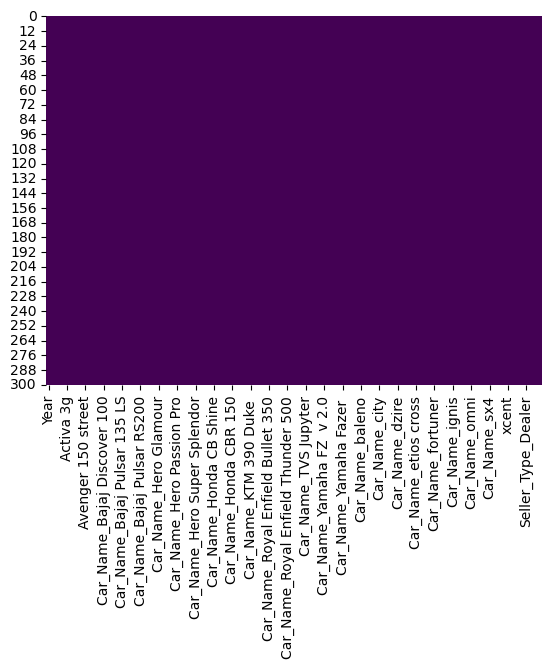

In [21]:
sns.heatmap(data.isna(),cbar=False,cmap='viridis')
plt.show()

In [22]:
# count the category element
d_types=dict(data.dtypes)
for name,type_ in d_types.items():
    if str(type_)=="int32":
        print(f"<===========(name)=========>")
        print(data[name].value_counts())
        print()


<===========(name)=========>
0    299
1      2
Name: Activa 3g, dtype: int64

<===========(name)=========>
0    300
1      1
Name: Activa 4g, dtype: int64

<===========(name)=========>
0    300
1      1
Name: Car_Name_Bajaj  ct 100, dtype: int64

<===========(name)=========>
0    300
1      1
Name: Bajaj Avenger 150, dtype: int64

<===========(name)=========>
0    300
1      1
Name: Avenger 150 street, dtype: int64

<===========(name)=========>
0    298
1      3
Name: Car_Name_Bajaj Avenger 220, dtype: int64

<===========(name)=========>
0    299
1      2
Name: Car_Name_Bajaj Avenger 220 dtsi, dtype: int64

<===========(name)=========>
0    300
1      1
Name: Car_Name_Bajaj Avenger Street 220, dtype: int64

<===========(name)=========>
0    300
1      1
Name: Car_Name_Bajaj Discover 100, dtype: int64

<===========(name)=========>
0    299
1      2
Name: Car_Name_Bajaj Discover 125, dtype: int64

<===========(name)=========>
0    300
1      1
Name: Car_Name_Bajaj Dominar 400, dtype: int

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Columns: 108 entries, Year to Transmission_Manual
dtypes: float64(2), int32(104), int64(2)
memory usage: 131.8 KB


In [24]:
data

,Year,Selling_Price,Present_Price,Kms_Driven,Activa 3g,Activa 4g,Car_Name_Bajaj ct 100,Bajaj Avenger 150,Avenger 150 street,Car_Name_Bajaj Avenger 220,...,vitara brezza,Car_Name_wagon r,xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
297,2015,4.00,5.90,60000,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
298,2009,3.35,11.00,87934,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
299,2017,11.50,12.50,9000,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


## Task 2:- Feature selection and Engineering

#### Feature selection and feature engineering are essential steps in the process of preparing data for machine learning models. They both aim to improve the performance of machine learning models by selecting relevant features and creating new features from the existing data.

#### Feature selection: Feature selection is the process of choosing a subset of the most relevant features (variables or columns) from the original set of features in your dataset. The goal is to remove irrelevant, redundant, or noisy features that do not contribute significantly to the predictive power of the model. Feature selection has several advantages:

#### Simplifies the Model: Fewer features mean simpler models, which are easier to understand and interpret.

#### Reduces Overfitting: Removing irrelevant or redundant features can help prevent overfitting, where the model performs well on the training data but poorly on unseen data.

#### Improves Training Speed: Smaller feature sets reduce the computational cost and training time of machine learning models

#### Feature engineering involves creating new features or transforming existing features to make them more informative for the machine learning model. It aims to capture hidden patterns or relationships in the data that the model might not learn from the raw features alone. Feature engineering is a creative and domain-specific process and can significantly impact the model's performance

### One hot Encoding:
##### Here in this data cars are using differnt types of fuel so we can use one hot encoding

In [25]:
columns_to_exclude = [
 'Selling_Price',
 'Activa 3g',
 'Activa 4g',
 'Car_Name_Bajaj ct 100',
 'Bajaj Avenger 150',
 'Avenger 150 street',
 'Car_Name_Bajaj Avenger 220',
 'Car_Name_wagon r',
 'xcent'
]
# Select columns that are NOT in the columns_to_exclude list
x = data.loc[:, ~data.columns.isin(columns_to_exclude)]


In [26]:
x

,Year,Present_Price,Kms_Driven,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 220 dtsi,Car_Name_Bajaj Avenger Street 220,Car_Name_Bajaj Discover 100,Car_Name_Bajaj Discover 125,Car_Name_Bajaj Dominar 400,Car_Name_Bajaj Pulsar NS 200,...,Car_Name_sx4,Car_Name_verna,vitara brezza,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,5.59,27000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,2013,9.54,43000,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
2,2017,9.85,6900,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,2011,4.15,5200,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,2014,6.87,42450,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
297,2015,5.90,60000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
298,2009,11.00,87934,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
299,2017,12.50,9000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [27]:
data.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Activa 3g',
       'Activa 4g', 'Car_Name_Bajaj  ct 100', 'Bajaj Avenger 150',
       'Avenger 150 street', 'Car_Name_Bajaj Avenger 220',
       ...
       'vitara brezza', 'Car_Name_wagon r', 'xcent', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Dealer',
       'Seller_Type_Individual', 'Transmission_Automatic',
       'Transmission_Manual'],
      dtype='object', length=108)

In [28]:
x.head()


,Year,Present_Price,Kms_Driven,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 220 dtsi,Car_Name_Bajaj Avenger Street 220,Car_Name_Bajaj Discover 100,Car_Name_Bajaj Discover 125,Car_Name_Bajaj Dominar 400,Car_Name_Bajaj Pulsar NS 200,...,Car_Name_sx4,Car_Name_verna,vitara brezza,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,5.59,27000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,2013,9.54,43000,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
2,2017,9.85,6900,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,2011,4.15,5200,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,2014,6.87,42450,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [29]:
x=data.iloc[:,1:5]
x

,Selling_Price,Present_Price,Kms_Driven,Activa 3g
0,3.35,5.59,27000,0
1,4.75,9.54,43000,0
2,7.25,9.85,6900,0
3,2.85,4.15,5200,0
4,4.60,6.87,42450,0
...,...,...,...,...
296,9.50,11.60,33988,0
297,4.00,5.90,60000,0
298,3.35,11.00,87934,0
299,11.50,12.50,9000,0


In [30]:
y=data.iloc[:,1:2]
y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


In [31]:
x.shape,y.shape

((301, 4), (301, 1))

## Model Selection

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)


In [34]:
x_train.head(10)

,Selling_Price,Present_Price,Kms_Driven,Activa 3g
293,3.25,9.900,38000,0
93,23.00,30.610,40000,0
47,1.05,4.150,65000,0
175,0.38,0.787,75000,0
84,3.49,13.460,197176,0
16,7.25,10.790,41678,0
83,12.50,13.460,38000,0
292,6.40,8.400,12000,0
42,1.95,7.150,58000,0
106,1.35,3.450,16500,0


### Task 2-  Standard Scaler and Feature Scaling

###### StandardScaler is a preprocessing technique in scikit-learn that standardizes the features by removing the mean and scaling to unit variance. This is important for many machine learning algorithms as it helps ensure that all features have the same scale, which can improve the model's convergence and performance.



In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [37]:
x_train.shape,x_test.shape

((240, 4), (61, 4))

NameError: name 'means' is not defined

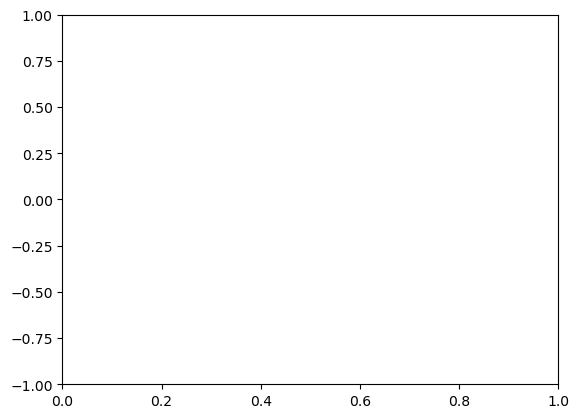

In [47]:
plt.ylim(-1,1)
for i in range(x_test.shape[1]):
    means.append(np.mean(x_test[:, i]))
plt.plot(means,scaley=False)

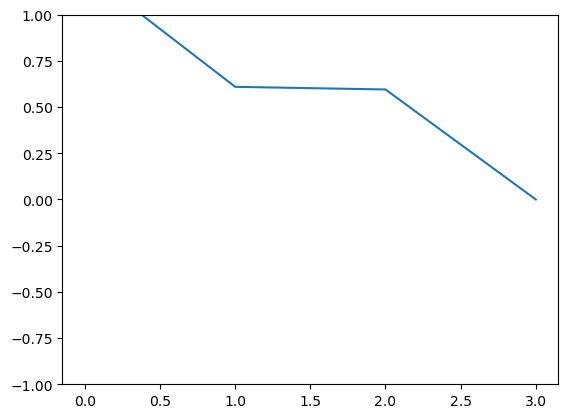

In [39]:
# chack variance
#STD
plt.ylim(-1,1)
vars=[]
for i in range(x.shape[1]):
    vars.append(np.var(x_test[:,i]))
plt.plot(vars)

##### plt.ylim(-1, 1): This line sets the y-axis (vertical axis) limits of the plot. It specifies that the y-axis should range from  -1 to 1. This is often used to adjust the range of the y-axis to focus on a specific interval. vars = []: This line initializes an empty list named vars to store the variances of the columns. for i in range(x.shape[1]):: This is a loop that iterates through the columns of the x_test dataset. x.shape[1] returnsmthe number of columns in x_test, and the loop runs from 0 to one less than this number. vars.append(np.var(x_test[:, i])): Inside the loop, this line calculates the variance of the data in each column of x_test. x_test[:, i] extracts the values of the i-th column, and np.var() computes the variance of those values. The variance of each column is then appended to the vars list. plt.plot(vars): After the loop, this line plots the variances against their corresponding column indices (0, 1, 2, etc.). The plt.plot() function is used to create the line plot. vars contains the y-values (variances of the columns), and the x-values are implicitly generated as the indices of the vars list. In summary, this code calculates the variances of the columns in x_test and then creates a line plot showing how the variances vary across the columns. The y-axis is limited to the range -1 to 1 for better visualization, and the variances provide information about the spread or dispersion of data in each column.

## Task3 - Different types of Algorithms for continuos data


### Supervised learning is a type of machine learning where the algorithm learns from labeled data, making predictions or classifications based on input features. There are various algorithms used in supervised learning, each with its own strengths and weaknesses. Here are some common types of supervised learning algorithms: 

#### (i) Linear regression - Linear regression is a statistical method used in machine learning and statistics to model the relationship between adependent variable and one or more independent variables by fitting a linear equation to the observed data. The goal is to find the best-fitting line (or hyperplane in the case of multiple independent variables) that minimizes the sum of the squared differences between the observed and predicted values.


In [40]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [41]:
# predict the test set results
y_pred=model.predict(x_test)
y_pred

array([[ 3.75],
       [ 7.9 ],
       [ 3.25],
       [ 5.5 ],
       [ 4.75],
       [ 0.2 ],
       [ 0.4 ],
       [ 0.3 ],
       [ 6.1 ],
       [ 4.  ],
       [ 0.95],
       [ 2.75],
       [ 6.75],
       [ 6.  ],
       [ 4.5 ],
       [ 0.2 ],
       [12.9 ],
       [ 2.9 ],
       [ 4.  ],
       [ 8.25],
       [23.5 ],
       [ 1.15],
       [ 0.35],
       [ 1.  ],
       [ 9.1 ],
       [ 7.2 ],
       [ 2.25],
       [ 0.6 ],
       [ 9.5 ],
       [ 3.95],
       [ 0.5 ],
       [ 4.4 ],
       [ 0.25],
       [ 0.4 ],
       [ 7.5 ],
       [ 4.35],
       [ 0.55],
       [ 3.51],
       [ 6.5 ],
       [ 9.65],
       [ 2.65],
       [10.9 ],
       [ 4.1 ],
       [ 0.5 ],
       [ 0.65],
       [ 0.72],
       [ 0.31],
       [ 4.5 ],
       [ 4.5 ],
       [ 4.75],
       [14.73],
       [ 3.35],
       [ 7.5 ],
       [ 5.75],
       [ 1.15],
       [ 2.7 ],
       [ 3.75],
       [ 0.48],
       [ 6.85],
       [33.  ],
       [ 2.25]])

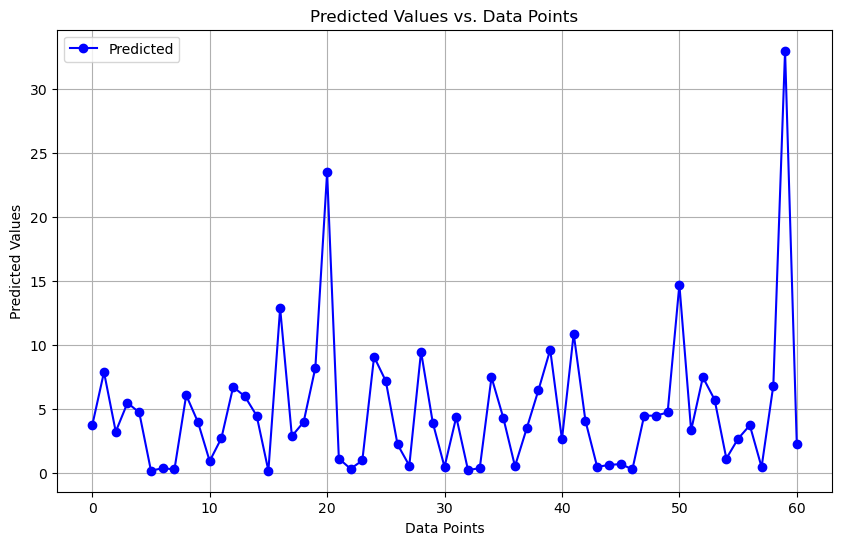

In [42]:
# Assuming you have already predicted y_pred using your model
# Create an array of indices for the data points
indices = range(len(y_pred))
# Create a line plot to visualize y_pred
plt.figure(figsize=(10, 6)) # Adjust the figure size as needed
plt.plot(indices, y_pred, marker='o', linestyle='-', color='b', label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Predicted Values')
plt.title('Predicted Values vs. Data Points')
plt.legend()
plt.grid(True)
plt.show()


In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Task 4 :- Training, Evaluate & Selection

In [44]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [45]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²) Score: {r2}")

Mean Absolute Error (MAE): 4.94245901639344
Mean Squared Error (MSE): 52.66387377049177
Root Mean Squared Error (RMSE): 7.256987926853108
R-squared (R²) Score: -1.286196546221967
